<a href="https://colab.research.google.com/github/Cfberrio/Lab-2-_Estructura-II/blob/main/networkx.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt
import math
import sys
import heapq

def haversine(lat1, lon1, lat2, lon2):
    rad=math.pi/180
    dlat=lat2-lat1
    dlon=lon2-lon1
    R=6372.795477598
    a=(math.sin(rad*dlat/2))**2 + math.cos(rad*lat1)*math.cos(rad*lat2)*(math.sin(rad*dlon/2))**2
    distancia=2*R*math.asin(math.sqrt(a))
    return distancia


In [ ]:
from networkx.algorithms.centrality.percolation import dijkstra
import keyword
#Se llama a el archivo de excel donde estan los datos y se vuelve un dataframe
df = pd.DataFrame(pd.read_excel("datalab.xlsx"))
print(df.columns)
#se obtienen solo las columnas de origen y destino como dos listas independientes
origenes= df["Ciudad Origen"].tolist()
destinos=df['Ciudad Destino'].tolist()
#lo mismo pero con las columnas de coordenadas de origen y destino
cO=df['Coordenadas.O'].tolist()
cD=df['Coordenadas D'].tolist()
#se quitan los repetidos en origenes para tener los nodos
capitales=list(dict.fromkeys(origenes))
#se crea el grafo
ciudades = nx.Graph()
#se introduce cada nodo siendo el nombre de cada ciudad de origen
for x in capitales:
  ciudades.add_node(x)
#se hace un ciclo para introducirle a cada nodo sus aristas
for i in ciudades.nodes:
  #ciclo para que vaya por cada uno de las ciudades destino para cada nodo
  for j in range(len(destinos)):
    #si la ciudad de origen actual es la misma que el nodo para el que se estan añadiendo las aristas
    if i== origenes[j]:
      #se buscan las coordenadas en el mismo index(fila del comumento de excel) y usando la funcion se saca la distancia
      cord1=cO[j].split(', ')
      cord2=cD[j].split(', ')
      lat1 =float(cord1[0])
      lon1 =float(cord1[1])
      lat2 =float(cord2[0])
      lon2 =float(cord2[1])
      #funcion para sacar la distancia
      distancia = haversine(lat1,lon1,lat2,lon2)
      via={destinos[j]:distancia}
      #que el se añada en su lista ese elemento en la lista de destinos con el mismo indice que con la verificacion de la lista origenes
      ciudades.add_edge(i, destinos[j], weight=distancia)

#print(ciudades.nodes)
#print(ciudades.order())
floyd = nx.floyd_warshall(ciudades, weight='weight')
djkstra = nx.shortest_path(ciudades, source='BARRANQUILLA', weight='weight')
floyd2 = dict(nx.all_pairs_shortest_path(ciudades))
print("dijkstra: ", djkstra)
print("\n")
print("floyd: ",floyd)
print("\n")
print("floyd 2: ",floyd2)



Index(['Ciudad Origen', 'Pais Origen', 'Ciudad Destino', 'Coordenadas.O',
       'Coordenadas D'],
      dtype='object')
dijkstra:  {'BARRANQUILLA': ['BARRANQUILLA'], 'ARMENIA': ['BARRANQUILLA', 'ARMENIA'], 'CARTAGENA': ['BARRANQUILLA', 'CARTAGENA'], 'MONTERIA': ['BARRANQUILLA', 'MONTERIA'], 'RIOHACHA': ['BARRANQUILLA', 'RIOHACHA'], 'VALLEDUPAR': ['BARRANQUILLA', 'VALLEDUPAR'], 'BUCARAMANGA': ['BARRANQUILLA', 'BUCARAMANGA'], 'BOGOTA': ['BARRANQUILLA', 'BOGOTA'], 'SANTA MARTA': ['BARRANQUILLA', 'SANTA MARTA'], 'MEDELLIN': ['BARRANQUILLA', 'MEDELLIN'], 'CALI': ['BARRANQUILLA', 'CALI'], 'SAN ANDRES - ISLA': ['BARRANQUILLA', 'SAN ANDRES - ISLA'], 'CUCUTA': ['BARRANQUILLA', 'CUCUTA'], 'LETICIA': ['BARRANQUILLA', 'LETICIA'], 'PEREIRA': ['BARRANQUILLA', 'PEREIRA'], 'PASTO': ['BARRANQUILLA', 'PASTO'], 'VILLAVICENCIO': ['BARRANQUILLA', 'VILLAVICENCIO'], 'YOPAL': ['BARRANQUILLA', 'CARTAGENA', 'YOPAL'], 'NEIVA': ['BARRANQUILLA', 'MEDELLIN', 'NEIVA'], 'MITU': ['BARRANQUILLA', 'VILLAVICENCIO', 'MIT

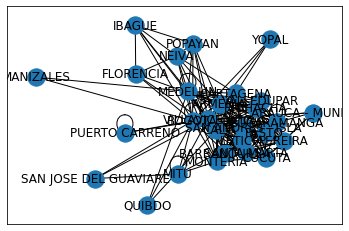

In [ ]:
nx.draw_networkx(ciudades)


In [ ]:
nx.write_gexf(ciudades, "prueba1.gexf", version="1.2draft")